#**Exploring the Response Variable and Concluding the Initial Exploration**

We have now looked through all the features to see whether any data is missing, as well as to generally examine them. The features are important because they constitute the inputs to our machine learning algorithm. On the other side of the model lies the output, which is a prediction of the response variable. For our problem, this is a binary flag indicating whether or not an account will default the next month, which would have been October for our historical datase.

This problem is called a binary classification task. In our labeled data, the samples (accounts) that defaulted (that is, 'default payment next month' = 1) are said to belong to the **positive class**, while those that didn't belong to the **negative class.** 

In [33]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 100 #high res figures

------------------------------------------------------------------------------------------
**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
#Read the dataset
df=pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,university,0,0,0,1


In [7]:
#Y- Target variable 
Y=df['default payment next month']
Y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [8]:
#X- Feature variable
X=df.loc[:,df.columns!='default payment next month']
X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,university,0,0,0,1


In [9]:
#Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [10]:
#Dropping 'Education_Cat' from the features as it is Object Dtype
X.drop(['EDUCATION_CAT','ID'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
#Shape of X-Features and Y- Target
Y.shape, X.shape

((26664,), (26664, 27))

In [15]:
X=np.array(X)
Y=np.array(Y)
#Reshape Y-Target
Y=np.reshape(Y,(Y.shape[0],1))
print(Y,Y.dtype) #Print the Y- Target Data type

Y.shape,X.shape

[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]] int64


((26664, 1), (26664, 27))

In [16]:
#Splitting the data into Train & Test 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((19998, 27), (6666, 27), (19998, 1), (6666, 1))

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [17]:
#Model Selection 
from sklearn.linear_model import LogisticRegression

In [28]:
#Model Fitting 
clf_baseline=LogisticRegression(solver='liblinear',multi_class='ovr')
clf_baseline.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [29]:
#Prediction 
Y_pred=clf_baseline.predict_proba(X_test)
Y_pred

array([[0.82138066, 0.17861934],
       [0.88282993, 0.11717007],
       [0.85077692, 0.14922308],
       ...,
       [0.92657283, 0.07342717],
       [0.68393143, 0.31606857],
       [0.69917801, 0.30082199]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [30]:
#Roc & Auc Curve
from sklearn.metrics import roc_curve,roc_auc_score

In [31]:
ruc_score=roc_auc_score(Y_test,Y_pred[:,1])
ruc_score

0.6534369057653975

_________________________________________________________________________
**Now, plot the ROC curve.**


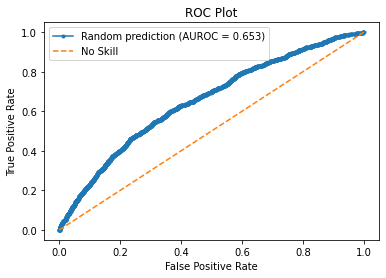

In [34]:
fpr,tpr, _ = roc_curve(Y_test, Y_pred[:,1])

plt.plot(fpr, tpr, marker='.', label='Random prediction (AUROC = %0.3f)' % ruc_score)
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [35]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_pred[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.34


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


In [36]:
import sklearn
sklearn.__version__

'0.22.2.post1'

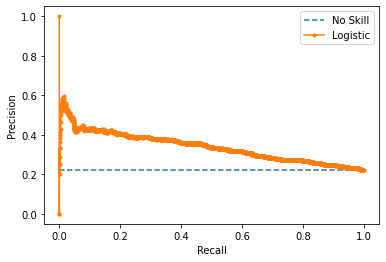

In [37]:
from sklearn.metrics import precision_recall_curve

no_skill = len(Y[Y==1]) / len(Y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
precision, recall, _ = precision_recall_curve(Y_test, Y_pred[:,1])
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [38]:
from sklearn.metrics import auc
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Logistic PR AUC: 0.339


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [39]:
Y_pred_train=clf_baseline.predict_proba(X_train)
ruc_score_train=roc_auc_score(Y_train,Y_pred_train[:,1])
ruc_score_train

0.6495957496936208

    How is this different, conceptually and quantitatively, from your earlier calculation?
